Necessary commands to run the notebook

In [1]:
!pip install pandas --upgrade


In [2]:
!pip install matplotlib seaborn --upgrade --quiet

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# A Comprehensive study on Democracy and it's Social Implications 

## No one is born a good citizen, no nation is born a democracy. Rather, both are processes that continue to evolve over a lifetime. - Kofi Annan

Democracy is perhaps the most popular form of government in 21st century. However, a substantial amount of world population live in non-democratic regimes. The effect of democracy on our lives can be truly understood under the context of the influence that it has on social well-being of people.

In this study, we will put some light on some of those aspects.

In [3]:
# Importing all the tables required

age_df = pd.read_csv('1age-of-democracies.csv') # Table containing countries and the age as a democracy on 2015 
countries_df = pd.read_csv('2countries.csv') # Table containing countries data 
bribery_df = pd.read_csv('3bribery-rates.csv') # Table containing countries and bribery rate 
humanrights_df = pd.read_csv('4human-rights-scores.csv') # Table containing countries and human rights scores
rightsviolation_df = pd.read_csv('5human-rights-violations.csv') # Table containing countries and human rights violations
pressfreedom_df = pd.read_csv('6world-press-freedom.csv') # Table containing countries and pressfreedom
mistrust_df = pd.read_csv('7share-of-people.csv') # Table containing countries and share of people mistrusting government
le_regime_df = pd.read_csv('9life-expectancy-vs-political-regime.csv') # Table containing life expectancy vs plitical regime
ls_le_df = pd.read_csv('10life-satisfaction-vs-life-expectancy.csv') # Table containing life expectancy vs life satisfaction 
share_happy_df = pd.read_csv('11share-who-say-happy.csv') # Table containing countries and share of happy people

Let us find the 50 oldest democratic countries

In [4]:
# Getting the 50 oldest countries based on age using sort_vales() and head() method

oldest_df = age_df.sort_values("age of democracy on 2015", ascending = False).head(50)
oldest_df

,location,age of democracy on 2015
186,United States,216.0
168,Switzerland,168.0
123,New Zealand,159.0
30,Canada,149.0
185,United Kingdom,131.0
99,Luxembourg,126.0
16,Belgium,122.0
122,Netherlands,119.0
128,Norway,116.0
8,Australia,115.0


Now, let find us the percentage share of democratic and non-democratic countries in the world and plot them in a pie-chart.

In [ ]:
# Counting the null values using the isnull() method

non_democratic_countries = sum(pd.isnull(age_df['age of democracy on 2015']))
democratic_countries = age_df.shape[0]-non_democratic_countries

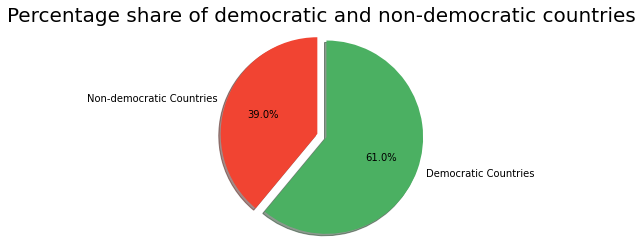

In [6]:
# Pie chart to show the percentage share of democratic and non-democratic countries in the world

labels = 'Non-democratic Countries', 'Democratic Countries'
sizes = [non_democratic_countries, democratic_countries]
explode = (0.1, 0)  
a, b =[plt.cm.Reds, plt.cm.Greens]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,colors=[a(0.6), b(0.6)], labels=labels, autopct='%.1f%%',
        shadow=True, startangle=90)
plt.title("Percentage share of democratic and non-democratic countries", fontsize = 20) 
ax1.axis('equal')

plt.show()

However, this does not give us a clear idea of what share of people live in democratic and non-democratic regimes. So,
let us now try to find the share of people in the two categories and again plot them in a pie-chart

In [47]:
# Merging countries dataframe with age dataframe using merge() method based on location

countrydatas_df = countries_df.merge(age_df, on="location")

In [8]:
countrydatas_df

,location,continent,population,gdp_per_capita,age of democracy on 2015
0,Afghanistan,Asia,38928341,1803.987,NaN
1,Albania,Europe,2877800,11803.431,19.0
2,Algeria,Africa,43851043,13913.839,NaN
3,Andorra,Europe,77265,NaN,22.0
4,Angola,Africa,32866268,5819.495,NaN
...,...,...,...,...,...
176,Venezuela,South America,28435943,16745.022,NaN
177,Vietnam,Asia,97338583,6171.884,NaN
178,Yemen,Asia,29825968,1479.147,NaN
179,Zambia,Africa,18383956,3689.251,8.0


In [48]:
# Finding the number of people in non-democratic countries using for loop

total_population = countrydatas_df["population"].sum()
index1 = countrydatas_df[countrydatas_df['age of democracy on 2015'].isnull()].index.tolist()
sum1=0
for i in index1:
    sum1 += countrydatas_df['population'][index1]
    break
non_democratic_population=sum1.sum()
democratic_population=total_population-non_democratic_population

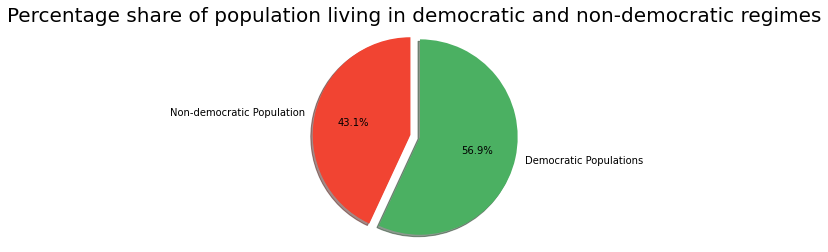

In [10]:
# Pie chart to show share of people live in democratic and non-democratic regimes

labels = 'Non-democratic Population', 'Democratic Populations'
sizes = [non_democratic_population, democratic_population]
explode = (0.1, 0)  
a, b =[plt.cm.Reds, plt.cm.Greens]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,colors=[a(0.6), b(0.6)], labels=labels, autopct='%.1f%%',
        shadow=True, startangle=90)
plt.title("Percentage share of population living in democratic and non-democratic regimes", fontsize = 20) 
ax1.axis('equal') 

plt.show()


We can see here that the percentage share of people living in non-democratic countries is more than the percentage shareof non-democratic countries. 


Let us now find the number of democratic countries in different continents and draw a pie-chart

In [49]:
# Counting the number of democratic countries in each continent using the groupby() method

continentcount_df = countrydatas_df.groupby(["continent"]).agg(["count"])
continentcount_df['age of democracy on 2015']

,count
continent,
Africa,19
Asia,13
Europe,42
North America,21
Oceania,4
South America,11


<AxesSubplot:ylabel='age of democracy on 2015'>

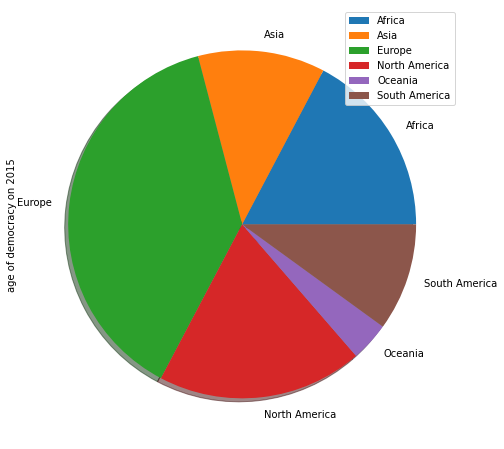

In [12]:
# Plotting a pie-chart inside the groupby() method

countrydatas_df.groupby(['continent']).count().plot(kind='pie', y='age of democracy on 2015', shadow = True,
                                                   figsize=(10,8))

The reason behind Europe having the highest number of democratic countries can be attributed to its greater influence in the world till the mid twentieth century. Almost all of the globe was colonized by european countries. And for this reason most other democratic countries are relatively new except a few.

Furthermore, almost all the revolutions to overthrow monarchy and establish sovereign nations started in Europe.

## Let us know try find correlate democracy and some social aspects. Here we will examine how strongly democracy influences some of the major social aspects in our world.


## At first, we will look into corruption 

One of the ways in which corruption can be quantified is bribery. We have gathered the data for bribery rates on 2016 of different countries . Here, we list the top 10 countries on bribery rates.

In [13]:
# Getting the unique values of bribery rates by deleting the rows except that of the latest year using drop() method

briberyunique_df = bribery_df.drop(bribery_df[bribery_df.year != 2016 ].index)

In [14]:
# Merging countries dataframe with bribery rate dataframe using merge() method based on location

countrybribery_df = countrydatas_df.merge(briberyunique_df, on="location")

In [15]:
# Getting the top 10 countries based on bribery rates using sort_vales() and head() method

most_corrupt_df = countrybribery_df.sort_values("bribery rate", ascending = False).head(10)
most_corrupt_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year,bribery rate
45,Yemen,Asia,29825968,1479.147,NaN,2016,77
11,Egypt,Africa,102334403,10550.206,NaN,2016,50
39,Tajikistan,Asia,9537642,2896.913,NaN,2016,50
37,Sudan,Africa,43849269,4466.507,NaN,2016,48
28,Morocco,Africa,36910558,7485.013,NaN,2016,48
26,Moldova,Europe,4033963,5189.972,25.0,2016,42
42,Ukraine,Europe,43733759,7894.393,25.0,2016,38
3,Azerbaijan,Asia,10139175,15847.419,NaN,2016,38
22,Kyrgyzstan,Asia,6524191,3393.474,NaN,2016,38
32,Russia,Europe,145934460,24765.954,NaN,2016,34


In [16]:
# Getting the number of common countries in two dataframes using intersect() method

common_1_count= len(np.intersect1d(oldest_df.location, most_corrupt_df.location))
common_1_count

0

One interesting result and also a quite obvious result is that none of the top 10 countries with highest bribery rates feature on the 50 of the oldest democratic countries list. We can infer from that as the democracies of the world have matured, corruption has eventually reduced as citizens understood the role of collective responsibility in social well-being.

## Let us now try to see the human rights index of the different countries.

In [17]:
humanrights_df

,location,year,human_rights_index
0,Afghanistan,1946,0.690479
1,Afghanistan,1947,0.739823
2,Afghanistan,1948,0.787035
3,Afghanistan,1949,0.816707
4,Afghanistan,1950,0.850675
...,...,...,...
11712,Zimbabwe,2013,-0.832728
11713,Zimbabwe,2014,-0.776670
11714,Zimbabwe,2015,-0.850764
11715,Zimbabwe,2016,-0.883085


In [18]:
# Merging countries dataframe with human rights dataframe using merge() method based on location

heat_hri_df = humanrights_df.merge(countries_df, on="location")
heat_hri_df

,location,year,human_rights_index,continent,population,gdp_per_capita
0,Afghanistan,1946,0.690479,Asia,38928341,1803.987
1,Afghanistan,1947,0.739823,Asia,38928341,1803.987
2,Afghanistan,1948,0.787035,Asia,38928341,1803.987
3,Afghanistan,1949,0.816707,Asia,38928341,1803.987
4,Afghanistan,1950,0.850675,Asia,38928341,1803.987
...,...,...,...,...,...,...
11044,Zimbabwe,2013,-0.832728,Africa,14862927,1899.775
11045,Zimbabwe,2014,-0.776670,Africa,14862927,1899.775
11046,Zimbabwe,2015,-0.850764,Africa,14862927,1899.775
11047,Zimbabwe,2016,-0.883085,Africa,14862927,1899.775


## Here, we plot the data of the countries over a period of 71 years (1946-2017) in a heatmap. This type of plot is useful in understanding the variation of a parameter over a period of time. 

<AxesSubplot:xlabel='year', ylabel='location'>

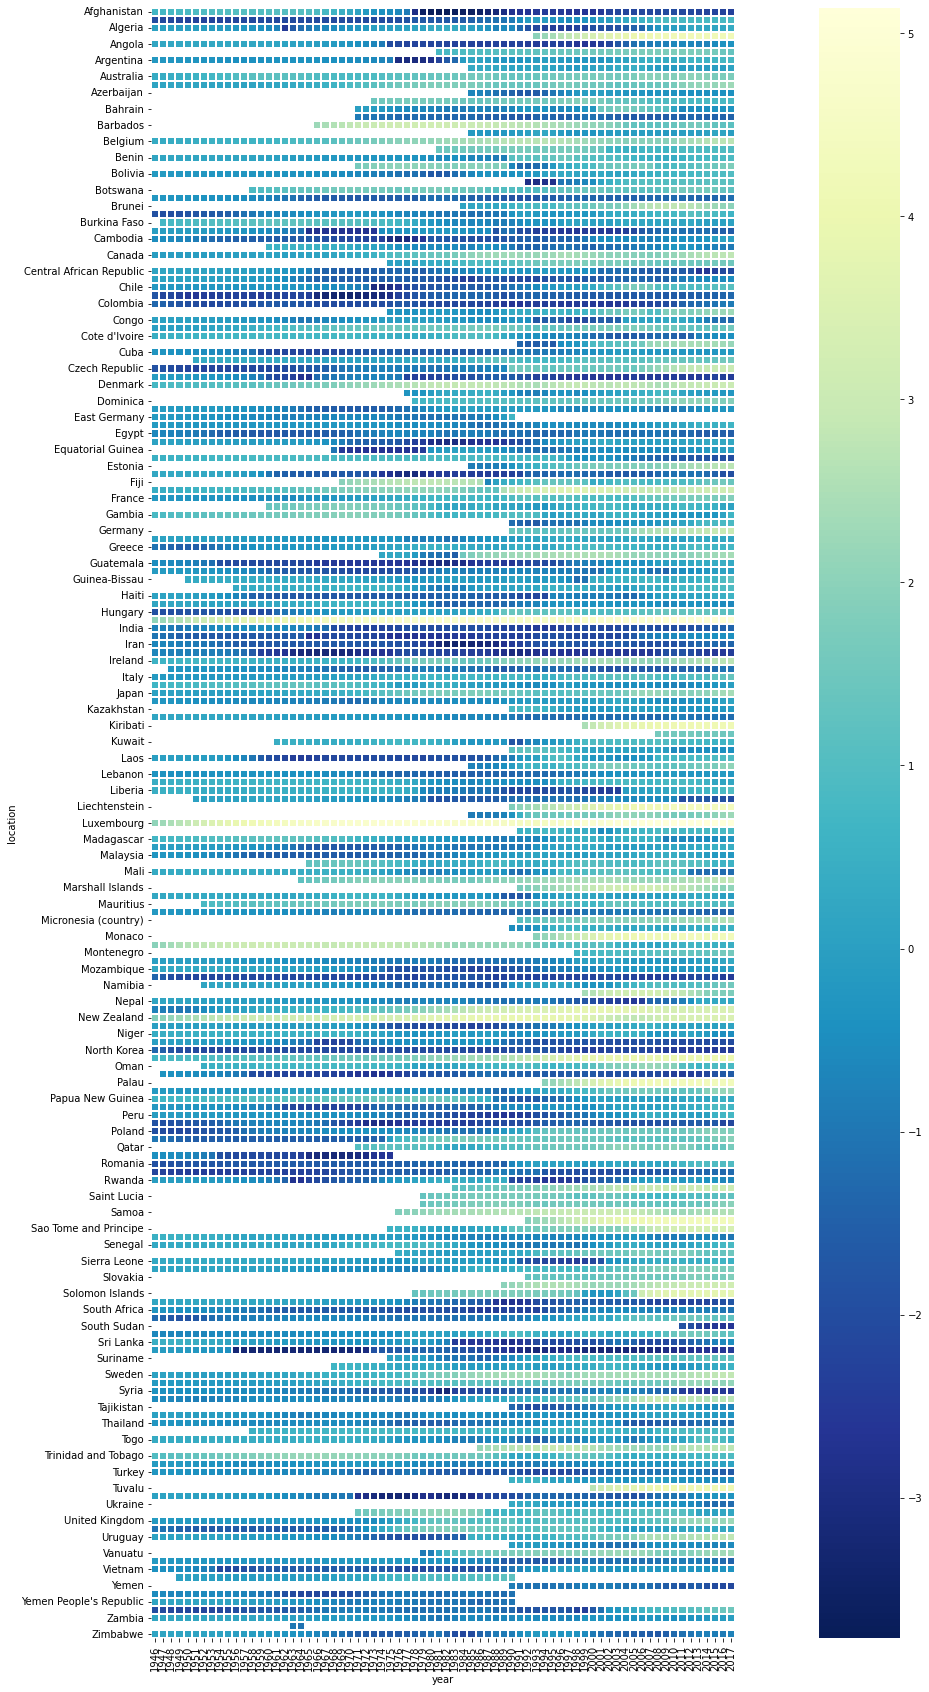

In [19]:
# Using the seaborn heatmap to visulalize the transition of human rights data over a period of time

hr_heatmap_df = humanrights_df.pivot( "location","year", "human_rights_index")
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(hr_heatmap_df, fmt="d", annot=False, linewidths=.1, square=True, cmap="YlGnBu_r")

If we look closely we will see that the human rights index of non-democratic countries are decreasing (like Afganistan, Syria, Iraq, Sudan, etc) and that of democratic countries are increasing. 

However, there are some cases where the trend doesn't follow any particular correlation and fluctuates randomly. These might be due to transitions in political scenario in the country within the considered period.

Now, we will list 10 countries having the least human rights index

In [20]:
# Getting the unique values of human rights by deleting the rows except that of the latest year using drop() method

humanrightsunique_df = humanrights_df.drop(humanrights_df[humanrights_df.year != 2017 ].index)

# Merging countries dataframe with dataframe datframe containing unique values of human rights index using merge() method based on location

countrydatas_df = countrydatas_df.merge(humanrightsunique_df, on="location")

In [21]:
countrydatas_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year,human_rights_index
0,Afghanistan,Asia,38928341,1803.987,NaN,2017,-2.311017
1,Albania,Europe,2877800,11803.431,19.0,2017,0.851180
2,Algeria,Africa,43851043,13913.839,NaN,2017,0.354197
3,Andorra,Europe,77265,NaN,22.0,2017,4.221865
4,Angola,Africa,32866268,5819.495,NaN,2017,-0.388863
...,...,...,...,...,...,...,...
175,Venezuela,South America,28435943,16745.022,NaN,2017,-1.434521
176,Vietnam,Asia,97338583,6171.884,NaN,2017,-0.373984
177,Yemen,Asia,29825968,1479.147,NaN,2017,-2.108346
178,Zambia,Africa,18383956,3689.251,8.0,2017,-0.043186


In [22]:
# Getting the top 10 countries based on least human rights using sort_vales() and head() method

least_hr_df = countrydatas_df.sort_values("human_rights_index", ascending = True).head(10)
least_hr_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year,human_rights_index
150,South Sudan,Africa,11193729,1569.888,NaN,2017,-2.592481
158,Syria,Asia,17500657,NaN,NaN,2017,-2.558583
153,Sudan,Africa,43849269,4466.507,NaN,2017,-2.470596
114,Myanmar,Asia,54409794,5591.597,NaN,2017,-2.467334
45,Democratic Republic of Congo,Africa,89561404,808.133,NaN,2017,-2.431055
78,Iraq,Asia,40222503,15663.986,NaN,2017,-2.388372
0,Afghanistan,Asia,38928341,1803.987,NaN,2017,-2.311017
129,Philippines,Asia,109581085,7599.188,30.0,2017,-2.131015
177,Yemen,Asia,29825968,1479.147,NaN,2017,-2.108346
121,Nigeria,Africa,206139587,5338.454,33.0,2017,-2.058687


In [23]:
# Getting the number of common countries in two dataframes using intersect() method

common_2_count= len(np.intersect1d(oldest_df.location, least_hr_df.location))
common_2_count

1

In this case, we can see that surprisingly 1 country from the list of least human rights index featured in the list of 50 oldest democracies.


The trend of human rights index can be visualized better by using a line plot. 

In [24]:
# Creating dataframes for individual countries to plot their data in a line-plot

afgan_df =  humanrights_df.drop(humanrights_df[humanrights_df.location != 'Afghanistan' ].index)
sudan_df =  humanrights_df.drop(humanrights_df[humanrights_df.location != 'Sudan' ].index)
china_df =  humanrights_df.drop(humanrights_df[humanrights_df.location != 'China' ].index)
finland_df =  humanrights_df.drop(humanrights_df[humanrights_df.location != 'Finland' ].index)

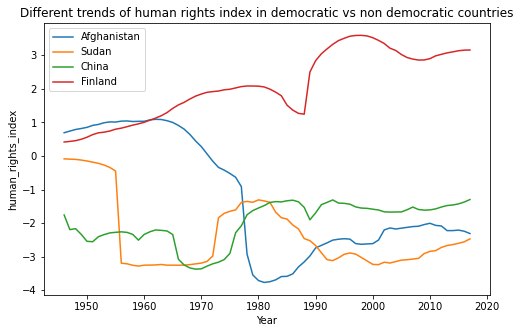

In [25]:
# Creating the line-plot human rights data of various countries over a period of 70 years

plt.figure(figsize=(8, 5))

plt.plot(afgan_df.year,afgan_df.human_rights_index);
plt.plot(sudan_df.year,sudan_df.human_rights_index);
plt.plot(china_df.year,china_df.human_rights_index);
plt.plot(finland_df.year,finland_df.human_rights_index);

plt.title("Different trends of human rights index in democratic vs non democratic countries")
plt.xlabel("Year")
plt.ylabel("human_rights_index")
plt.legend(['Afghanistan', 'Sudan','China','Finland']);

In the plot above we can see the  difference in trend followed by Finland and the trends followed by Afganistan, Sudan and China. This clearly depicts that human rights index for non-democratic countries were on a decline till 2000 and almost stagnant after that.

It is surprising to note that Afganistan had better human resourse index than Finland till 1960. It started to decline rapidly in the late 1970s. Much of it is attributed to the Soviet intervention in Afganistan followed by the  political turmoil and the eventual rise of Taliban.


## Let us now check the data for human rights violations

In [26]:
# Getting the unique values of human rights violation by deleting the rows except that of the latest year using drop() method

rightsviolationunique_df = rightsviolation_df.drop(rightsviolation_df[rightsviolation_df.year != 2014 ].index)
rightsviolationunique_df


,location,year,human_rights_violation
8,Afghanistan,2014,8.3
17,Albania,2014,5.5
26,Algeria,2014,7.4
35,Angola,2014,7.0
43,Antigua and Barbuda,2014,4.7
...,...,...,...
1537,Venezuela,2014,7.8
1546,Vietnam,2014,7.6
1555,Yemen,2014,9.0
1564,Zambia,2014,6.8


In [27]:
# Merging countries dataframe with human rights violation dataframe using merge() method based on location

countrydatas_df = countrydatas_df.merge(rightsviolationunique_df, on="location")
countrydatas_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year_x,human_rights_index,year_y,human_rights_violation
0,Afghanistan,Asia,38928341,1803.987,NaN,2017,-2.311017,2014,8.3
1,Albania,Europe,2877800,11803.431,19.0,2017,0.851180,2014,5.5
2,Algeria,Africa,43851043,13913.839,NaN,2017,0.354197,2014,7.4
3,Angola,Africa,32866268,5819.495,NaN,2017,-0.388863,2014,7.0
4,Antigua and Barbuda,North America,97928,21490.943,12.0,2017,1.335031,2014,4.7
...,...,...,...,...,...,...,...,...,...
166,Venezuela,South America,28435943,16745.022,NaN,2017,-1.434521,2014,7.8
167,Vietnam,Asia,97338583,6171.884,NaN,2017,-0.373984,2014,7.6
168,Yemen,Asia,29825968,1479.147,NaN,2017,-2.108346,2014,9.0
169,Zambia,Africa,18383956,3689.251,8.0,2017,-0.043186,2014,6.8


Here, the following table shows the top 10 countries with human rights violation

In [28]:
# Getting the top 10 countries based on human rights violations using sort_vales() and head() method

high_hrv_df = countrydatas_df.sort_values("human_rights_violation", ascending = False).head(10)
high_hrv_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year_x,human_rights_index,year_y,human_rights_violation
44,Democratic Republic of Congo,Africa,89561404,808.133,NaN,2017,-2.431055,2014,10.0
142,South Sudan,Africa,11193729,1569.888,NaN,2017,-2.592481,2014,9.9
150,Syria,Asia,17500657,NaN,NaN,2017,-2.558583,2014,9.9
139,Somalia,Africa,15893219,NaN,NaN,2017,-1.739185,2014,9.8
49,Egypt,Africa,102334403,10550.206,NaN,2017,-1.536420,2014,9.7
32,Chad,Africa,16425859,1768.153,NaN,2017,-0.515494,2014,9.5
31,Central African Republic,Africa,4829764,661.240,NaN,2017,-2.056798,2014,9.5
51,Equatorial Guinea,Africa,1402985,22604.873,NaN,2017,0.004124,2014,9.5
145,Sudan,Africa,43849269,4466.507,NaN,2017,-2.470596,2014,9.3
165,Uzbekistan,Asia,33469199,6253.104,NaN,2017,-0.588449,2014,9.3


In [29]:
# Getting the number of common countries in two dataframes using intersect() method

common_3_count= len(np.intersect1d(high_hrv_df.location, oldest_df.location))
common_3_count

0

Here also, quite comprehensibly we can verify the previous result.

Now let us try to see how many countries are there in common in the list of least human rights index and highest human rights violation.

In [30]:
# Getting the number of common countries in two dataframes using intersect() method

common_4_count = len(np.intersect1d( least_hr_df.location, high_hrv_df.location))
common_4_count

4

It shows us that 4 countries feature in both the lists.

## Let us now look into press freedom state of various countries

In [31]:
# Getting the unique values of press freedom by deleting the rows except that of the latest year using drop() method

pressfreedomunique_df = pressfreedom_df.drop(pressfreedom_df[pressfreedom_df.year != 2019 ].index)
pressfreedomunique_df

,location,year,press_freedom_score
2,Afghanistan,2019,36.55
5,Albania,2019,29.84
8,Algeria,2019,45.75
11,Andorra,2019,24.63
14,Angola,2019,34.96
...,...,...,...
526,Venezuela,2019,49.10
529,Vietnam,2019,74.93
532,Yemen,2019,61.66
535,Zambia,2019,36.38


Let us now look at the press freedom scores ranges. Scores upto 20 are considered to be good.

In [32]:
# Grouping the number of countries based on intervals in press freedom scores using pd.cut() method inside the groupby() method

plot_freedom_df= pressfreedomunique_df.groupby(pd.cut(pressfreedomunique_df["press_freedom_score"], [0,20,40,60,80,100])).count()
plot_freedom_df

,location,year,press_freedom_score
press_freedom_score,,,
"(0, 20]",25,25,25
"(20, 40]",101,101,101
"(40, 60]",40,40,40
"(60, 80]",11,11,11
"(80, 100]",3,3,3


Now we plot them in a nested pie chart.

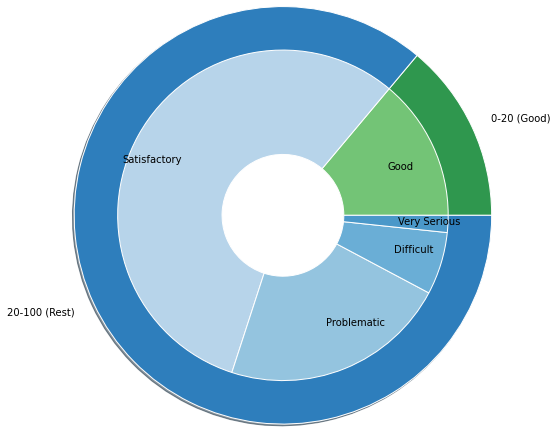

In [33]:
# Creating a nested pie-chart to visualize the main-groups and the sub-groups effectively 

group_names=['0-20 (Good)', '20-100 (Rest)']
group_size=[25,155]
subgroup_names=['Good','Satisfactory', 'Problematic', 'Difficult', 'Very Serious']
subgroup_size=[25,101,40,11,3]
 
# Create colors
a, b =[plt.cm.Greens, plt.cm.Blues]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.4, labels=group_names, colors=[a(0.7), b(0.7)],shadow = True )
plt.setp( mypie, width=0.6, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.4-0.5, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.3), b(0.4), b(0.5), b(0.6)])
plt.setp( mypie2, width=1.2, edgecolor='white')
plt.margins(0,0)
# show it
plt.show()

We can see that only 25 countries among a list of 180 have good press freedom scores. Most of the scandanavian countres feature in that group. This is alarming to notice the fact that more than 86 percent of the countries do not have good press freedom.

In [34]:
# Merging countries dataframe with press freedom scores dataframe using merge() method based on location

countrydatas_df = countrydatas_df.merge(pressfreedomunique_df, on="location")
countrydatas_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year_x,human_rights_index,year_y,human_rights_violation,year,press_freedom_score
0,Afghanistan,Asia,38928341,1803.987,NaN,2017,-2.311017,2014,8.3,2019,36.55
1,Albania,Europe,2877800,11803.431,19.0,2017,0.851180,2014,5.5,2019,29.84
2,Algeria,Africa,43851043,13913.839,NaN,2017,0.354197,2014,7.4,2019,45.75
3,Angola,Africa,32866268,5819.495,NaN,2017,-0.388863,2014,7.0,2019,34.96
4,Argentina,South America,45195777,18933.907,33.0,2017,0.784109,2014,4.4,2019,28.30
...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,South America,28435943,16745.022,NaN,2017,-1.434521,2014,7.8,2019,49.10
162,Vietnam,Asia,97338583,6171.884,NaN,2017,-0.373984,2014,7.6,2019,74.93
163,Yemen,Asia,29825968,1479.147,NaN,2017,-2.108346,2014,9.0,2019,61.66
164,Zambia,Africa,18383956,3689.251,8.0,2017,-0.043186,2014,6.8,2019,36.38


## Let us now look into the relation between polical regime type and life expectancy of various countries

In [35]:
# Getting the unique values of life expectancy & political regime by deleting the rows except that of the latest year using drop() method

le_regimeunique_df = le_regime_df.drop(le_regime_df[le_regime_df.year != 2018 ].index)

# Merging countries dataframe with life expectancy & political regime dataframe using merge() method based on location

countrydatas2_df = countries_df.merge(le_regimeunique_df, on="location")
countrydatas2_df


,location,continent_x,population,gdp_per_capita,year,total population on 2019,continent_y,life expectancy,political regime
0,Afghanistan,Asia,38928341,1803.987,2018,37172000.0,NaN,64.486,1.0
1,Albania,Europe,2877800,11803.431,2018,2883000.0,NaN,78.458,3.0
2,Algeria,Africa,43851043,13913.839,2018,42228000.0,NaN,76.693,1.0
3,Andorra,Europe,77265,NaN,2018,77000.0,NaN,83.594,NaN
4,Angola,Africa,32866268,5819.495,2018,30810000.0,NaN,60.782,1.0
...,...,...,...,...,...,...,...,...,...
203,Vietnam,Asia,97338583,6171.884,2018,95546000.0,NaN,75.317,0.0
204,Western Sahara,Africa,597330,NaN,2018,567000.0,NaN,70.017,NaN
205,Yemen,Asia,29825968,1479.147,2018,28499000.0,NaN,66.096,0.0
206,Zambia,Africa,18383956,3689.251,2018,17352000.0,NaN,63.510,1.0


In the below plot, we see the life expectancy of differnt political regime types 

<AxesSubplot:xlabel='political regime', ylabel='life expectancy'>

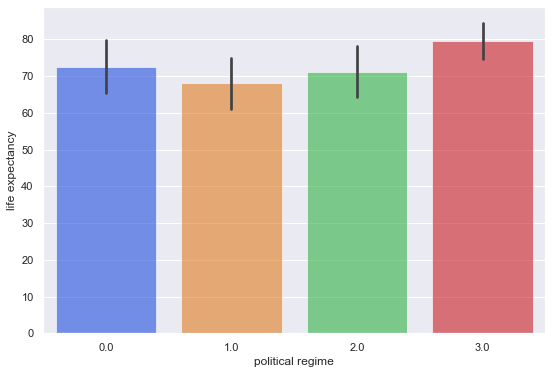

In [36]:
# Creating a bar-plot to visualize the life expectancy of various political regimes

fig_dims=(9,6)

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='political regime', y='life expectancy', data=countrydatas2_df,  ci="sd", palette="bright", alpha=.6)


0 - Closed Autocracy,
 1 - Electoral Autocracy,
 2 - Electoral Democracy,
 3 - Liberal Democracy,

Here, we can see that liberal democratic country has the highest life expectancy rate.

But the anomaly here is that the life expectancy rate of closed autocracy is not the least. The reason for this maybe is the restrictions on media and foreign intervention which may lead to false data.

## Let us now try to see if countries with higher life expectancy aslo have higher life satisfaction among the citizens

In [37]:
# Getting the unique values of life satisfaction & life expectancy by deleting the rows except that of the latest year using drop() method

ls_leunique_df = ls_le_df.drop(ls_le_df[ls_le_df.year != 2015 ].index)

# Merging countries dataframe with life satisfaction & life expectancy dataframe using merge() method based on location

countrydatas2_df = countrydatas2_df.merge(ls_leunique_df, on="location")
countrydatas2_df


,location,continent_x,population,gdp_per_capita,year_x,total population on 2019,continent_y,life expectancy_x,political regime,year_y,continent,life satisfaction,life expectancy_y
0,Afghanistan,Asia,38928341,1803.987,2018,37172000.0,NaN,64.486,1.0,2015,Asia,3.982855,63.288
1,Albania,Europe,2877800,11803.431,2018,2883000.0,NaN,78.458,3.0,2015,Europe,4.606651,78.174
2,Algeria,Africa,43851043,13913.839,2018,42228000.0,NaN,76.693,1.0,2015,Africa,NaN,75.860
3,Andorra,Europe,77265,NaN,2018,77000.0,NaN,83.594,NaN,2015,Europe,NaN,NaN
4,Angola,Africa,32866268,5819.495,2018,30810000.0,NaN,60.782,1.0,2015,Africa,NaN,61.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,Asia,97338583,6171.884,2018,95546000.0,NaN,75.317,0.0,2015,Asia,5.076315,76.052
204,Western Sahara,Africa,597330,NaN,2018,567000.0,NaN,70.017,NaN,2015,Africa,NaN,69.213
205,Yemen,Asia,29825968,1479.147,2018,28499000.0,NaN,66.096,0.0,2015,Asia,2.982674,64.743
206,Zambia,Africa,18383956,3689.251,2018,17352000.0,NaN,63.510,1.0,2015,Africa,4.843164,61.397


The below plot is a scatter plot to show the correlation between life expectancy and life satisfaction

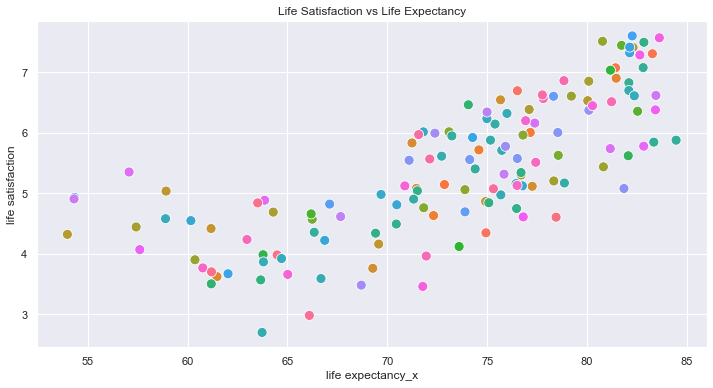

In [38]:
# Scatter plot to visualize the correlationbetween life expectancy and life satisfaction

plt.figure(figsize=(12, 6))
plt.title('Life Satisfaction vs Life Expectancy')

sns.scatterplot(x=countrydatas2_df['life expectancy_x'], 
                y= countrydatas2_df['life satisfaction'], 
                hue=countrydatas2_df.location,
                s=100,
                legend=False);


The above plot shows a postive trend in life satisfaction with life expectancy. This infers the idea that people in democratic societies tend to have higher life satisfaction.

## Now we will dive into the abstract aspect of happiness

Though it is very difficult to quantify happiness, many parameters have been used till now to give happiness an empirical status. Details of those parameters and study of their validity is beyond the scope of this study.

However, here we will try to get a brief idea about its correlation with type of political regime.

In [39]:
# Merging a specific column of countries dataframe with share of happy people dataframe using merge() method 

happy_comp_df = pd.merge(share_happy_df, countrydatas2_df[["political regime","location"]], on="location", how="left")
happy_comp_df

,location,year,share of people who are happy,political regime
0,Albania,1998,33.433434,3.0
1,Albania,2004,58.799999,3.0
2,Algeria,2004,80.733231,1.0
3,Algeria,2014,79.894180,1.0
4,Argentina,1984,78.571426,2.0
...,...,...,...,...
131,Venezuela,2004,86.333336,1.0
132,Vietnam,2004,91.399994,0.0
133,Vietnam,2009,91.873741,0.0
134,Zimbabwe,2004,56.387226,1.0


We will plot two line plots one for countries under liberal democracy and another for closed autocracy for two different time states to see the trend of the data. 

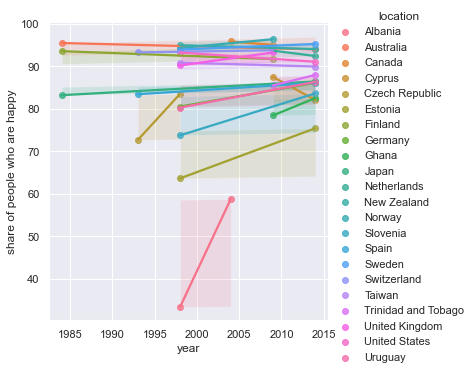

In [40]:
# Creating a lmplot to visualize the trend of share of happy people of countries with liberal democracy over two time states

three_df = happy_comp_df.drop(happy_comp_df[happy_comp_df['political regime'] != 3 ].index)

sns.lmplot(
    data=three_df,
    x="year", y="share of people who are happy", hue="location",
    height=5
)

This plot represents the countries under liberal democracy. The trend seems quite obvious from the idea that the social conditions are better in democratic regimes. However some countries show a negetive trend reasons for which can be attributed to abandonment and lonliness related effects in developed nations.

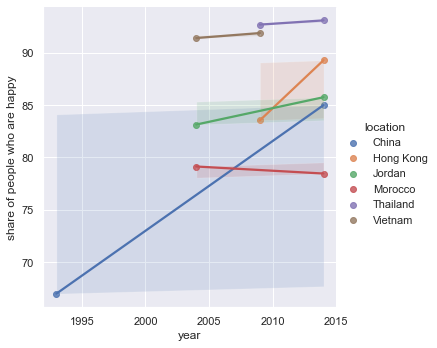

In [41]:
# Creating a lmplot to visualize the trend of share of happy people of countries with closed autocracy over two time states

zero_df = happy_comp_df.drop(happy_comp_df[happy_comp_df['political regime'] != 0 ].index)
sns.lmplot(
    data=zero_df,
    x="year", y="share of people who are happy", hue="location",
    height=5
)

The second plot however shows an absurd trend. Among all the countries with closed autocracy, except morocco, show a positive trend in percentage of happy people.

This peculiar trend maybe attributed to restricted press freedom and media coverage or prosecution of citizens for revealing the true state of the person and the society in that autocracy.

# Pitfall

## Inspite of its popularity and positive implications, there is hardly any place on earth where democracy is properly excercised. And the credit for this goes those who are the keepers of it. The "political parties".


In this section we will examine about the share of people who do not trust the political parties of their respective countries.

In [42]:
# Merging countries dataframe with share of people who do not trust the political parties dataframe using merge() method based on location

countrydatas_df = countrydatas_df.merge(mistrust_df, on="location")
countrydatas_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year_x,human_rights_index,year_y,human_rights_violation,year,press_freedom_score,percentage_people_mistrusting_political_parties
0,Afghanistan,Asia,38928341,1803.987,NaN,2017,-2.311017,2014,8.3,2019,36.55,36
1,Albania,Europe,2877800,11803.431,19.0,2017,0.851180,2014,5.5,2019,29.84,72
2,Algeria,Africa,43851043,13913.839,NaN,2017,0.354197,2014,7.4,2019,45.75,67
3,Argentina,South America,45195777,18933.907,33.0,2017,0.784109,2014,4.4,2019,28.30,78
4,Armenia,Asia,2963234,8787.580,NaN,2017,0.106262,2014,6.8,2019,28.98,57
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Venezuela,South America,28435943,16745.022,NaN,2017,-1.434521,2014,7.8,2019,49.10,77
95,Vietnam,Asia,97338583,6171.884,NaN,2017,-0.373984,2014,7.6,2019,74.93,27
96,Yemen,Asia,29825968,1479.147,NaN,2017,-2.108346,2014,9.0,2019,61.66,78
97,Zambia,Africa,18383956,3689.251,8.0,2017,-0.043186,2014,6.8,2019,36.38,70


Let us try to see how many countries are there who more than 50 years of being democratic and more than 50 percent of their citizens do not trust the political parties

In [43]:
# Creating new dataframes by filtering rows from an existing dataframe based on a condition

cpf_df = countrydatas_df[countrydatas_df['age of democracy on 2015']>50 ]
cpfm_df = cpf_df[cpf_df['percentage_people_mistrusting_political_parties']>50 ]
cpfm_df

,location,continent,population,gdp_per_capita,age of democracy on 2015,year_x,human_rights_index,year_y,human_rights_violation,year,press_freedom_score,percentage_people_mistrusting_political_parties
5,Australia,Oceania,25499881,44648.710,115.0,2017,1.753645,2014,2.3,2019,16.55,58
8,Belgium,Europe,11589616,42658.576,122.0,2017,2.729590,2014,1.5,2019,12.07,67
16,Canada,North America,37742157,44017.591,149.0,2017,2.791056,2014,2.1,2019,15.69,62
18,Colombia,South America,50882884,13254.949,58.0,2017,-0.892363,2014,7.1,2019,42.82,81
30,France,Europe,65273512,38605.671,70.0,2017,1.868427,2014,2.2,2019,22.21,73
36,India,Asia,1380004385,6426.674,66.0,2017,-1.394108,2014,5.6,2019,45.67,86
39,Israel,Asia,8655541,33132.320,68.0,2017,-1.064023,2014,7.1,2019,30.80,79
40,Italy,Europe,60461828,35220.084,70.0,2017,1.368498,2014,2.8,2019,24.98,89
41,Jamaica,North America,2961161,8193.571,54.0,2017,-0.026262,2014,5.1,2019,11.13,85
42,Japan,Asia,126476458,39002.223,64.0,2017,2.370680,2014,3.3,2019,29.36,80


In [44]:
# Printing using the format() method

print('There are {} countries where more than 50 percent of people do not trust the political parties even after 50 years of democratic rule'.format(len(cpfm_df)))

There are 14 countries where more than 50 percent of people do not trust the political parties even after 50 years of democratic rule


## Conclusion

The major takeaway from this observation is that even though democracy is the most suitable form of government for this century, the fate of the society still lies in the hands of the people. Freedom of speech and trust are the most vital aspects of a society and dictate many things including how much we know about a society.

The data for such studies would be of no use unless these conditions are well-prevailing in a society.

## References and Future Work

The data sets used here are huge and contain tens of thousands of rows of data. Aspects of individual countries can be studied in great detail using these data sets and the course of the data can be perdicted to a reasonable extent.


 References:

- www.ourworldindata.org

- www.stackoverflow.com

- www.geeksforgeeks.org

- www.w3schools.com

- pandas.pydata.org

- seaborn.pydata.org

- matplotlib.org